# **PREDICTING WAGES**

In this segment, we will examine a real-world example, where we will predict wages of the workers using a linear combination of workers characteristics and assess the predictive performance of our prediction rules using the Mean Squared Error (MSE), adjusted MSE and r-squared as well as out-of-sample MSE and r-squared.

The data comes from the March supplement of the U.S. Current Population Survey, the year 2012. It focuses on the single (never married) workers with education levels equal to high school, some college, or college graduates. The sample size is approx 4,000.

The outcome variable Y is an hourly wage, and the X’s are various characteristics of workers such as gender, experience, education, and geographical indicators.

## **Dataset** 

The dataset contains the following variables:
1. wage   : weekly wage
2. female : female dummy
3. cg     : college Graduate Dummy
4. sc     : some college dummy
5. hsg    : High School graduate dummy
6. mw     : mid-west dummy
7. so     : south dummy
8. we     : west dummy
9. ne     : northeast dummy
10. exp1   : experience(year)
11. exp2   : experience squared (taken as experience squared/100)
12. exp3   : experience cubed (taken as experience cubed/1000)

## **Importing the necessary libraries and overview of the dataset**

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Loading the data**

In [2]:
# Load data
df = pd.read_csv('predicting_wages.csv')

In [3]:
# See top 5 row in the dataset
df.head()

,female,cg,sc,hsg,mw,so,we,ne,exp1,exp2,exp3,wage
0,0,0,0,1,0,0,0,1,33.0,10.89,35.937,11.659091
1,0,1,0,0,0,0,0,1,27.0,7.29,19.683,12.825000
2,0,0,1,0,0,0,0,1,13.0,1.69,2.197,5.777027
3,0,1,0,0,0,0,0,1,2.0,0.04,0.008,12.468750
4,1,1,0,0,0,0,0,1,15.0,2.25,3.375,18.525000


### **Checking the info of the data**

In [4]:
# Checking info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3835 entries, 0 to 3834
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   female  3835 non-null   int64  
 1   cg      3835 non-null   int64  
 2   sc      3835 non-null   int64  
 3   hsg     3835 non-null   int64  
 4   mw      3835 non-null   int64  
 5   so      3835 non-null   int64  
 6   we      3835 non-null   int64  
 7   ne      3835 non-null   int64  
 8   exp1    3835 non-null   float64
 9   exp2    3835 non-null   float64
 10  exp3    3835 non-null   float64
 11  wage    3835 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 359.7 KB


**Observations:**
- The dataset has 3835 observations and 12 different variables.
- There is no missing value in the dataset. 
- All of the dummy variables (cg, sc, hsg, etc.) have the datatype as int. They are binary variables having values of 0 and 1.

## **Univariate Analysis**

### **Checking the summary statistics of the dataset**

In [5]:
# Printing the summary statistics for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
female,3835.0,0.417992,0.493293,0.000000,0.00000,0.000000,1.000000,1.000000
cg,3835.0,0.376271,0.484513,0.000000,0.00000,0.000000,1.000000,1.000000
sc,3835.0,0.323859,0.468008,0.000000,0.00000,0.000000,1.000000,1.000000
hsg,3835.0,0.299870,0.458260,0.000000,0.00000,0.000000,1.000000,1.000000
mw,3835.0,0.287614,0.452709,0.000000,0.00000,0.000000,1.000000,1.000000
so,3835.0,0.243546,0.429278,0.000000,0.00000,0.000000,0.000000,1.000000
we,3835.0,0.211734,0.408591,0.000000,0.00000,0.000000,0.000000,1.000000
ne,3835.0,0.257106,0.437095,0.000000,0.00000,0.000000,1.000000,1.000000
exp1,3835.0,13.353194,8.639348,2.000000,6.00000,11.000000,19.500000,35.000000
exp2,3835.0,2.529267,2.910554,0.040000,0.36000,1.210000,3.802500,12.250000


**Observations:**
- The average wage is about 15 dollars per hour while the maximum wage is 348, which is very high.
- 42% of workers are women.
- The average experience is 13 years, with the minimum and maximum being 2 and 35 years, respectively, indicating that the data is diversified and drawn from various experience groups.
- 38% of the people in the data are college graduates. 
- 32% have gone to some college, and 30% hold only high school diploma.
- You can also see geographical distribution of workers across major geographical regions of the states, and seem to be nearly same between 22-28%, which again shows maybe data is collected from different regions in a uniform manner. 

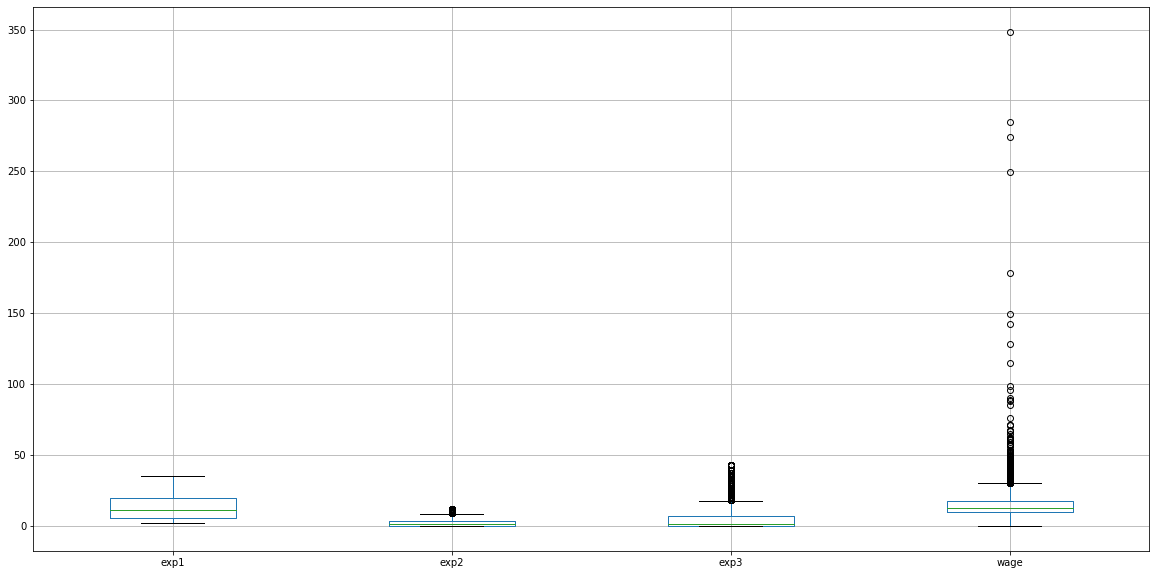

In [6]:
df[['exp1','exp2','exp3','wage']].boxplot(figsize=(20,10))
plt.show()

- For the wage variable, we can see that there are outliers, which makes sense because some people have higher earnings than others.

## **Bivariate Analysis**

### **Let's first look the relationship between the experience and Wages**

<AxesSubplot:xlabel='exp1', ylabel='wage'>

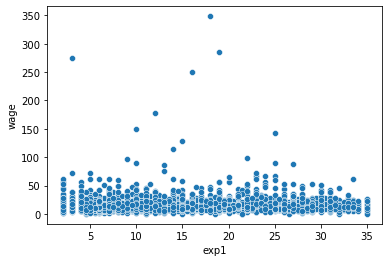

In [7]:
sns.scatterplot('exp1','wage',data=df)

- As we can see, there is no significant relationship between experience and wage. So the general assumptions about people with high experience may have high income is not true here.

### **Now make a list of dummy columns and check there relationship with wage**

In [8]:
cols=df.select_dtypes('int').columns.to_list()
cols

['female', 'cg', 'sc', 'hsg', 'mw', 'so', 'we', 'ne']

<AxesSubplot:xlabel='wage', ylabel='Density'>

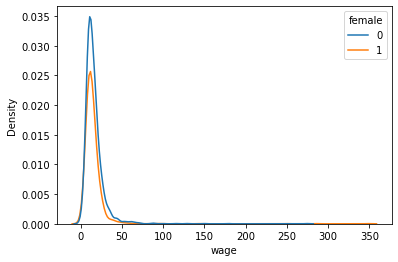

In [9]:
sns.kdeplot(df.wage,hue=df.female)

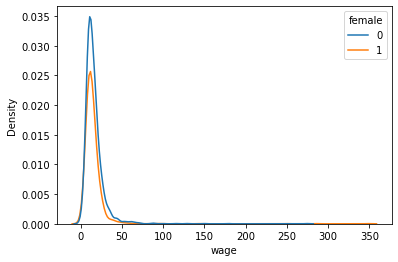

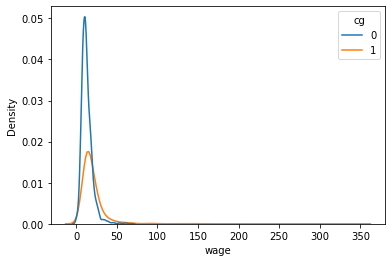

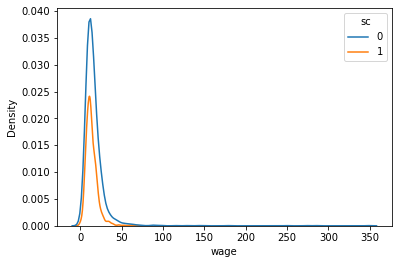

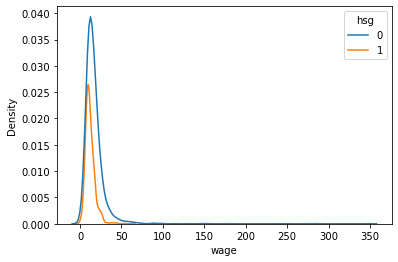

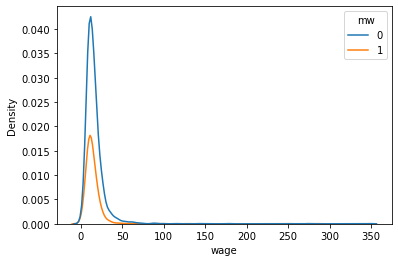

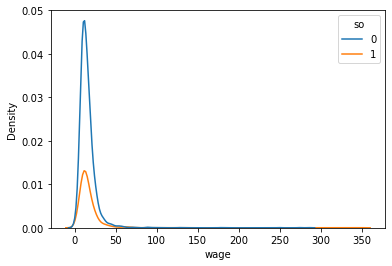

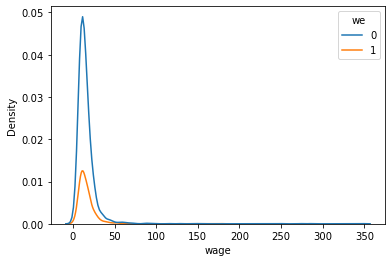

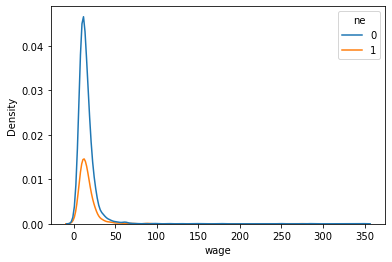

In [10]:
for i in cols:
    sns.kdeplot(df.wage,hue=df[i])
    plt.show()

- There is not a major difference that can be seen from these plots as the distribution of wages for female, education level, geographical regions for both (orange, blue) are same in each graph.  

### **As now we have done our analysis, lets move to Modeling.**


### **Basic Model**
- X consists of the female indicator (D) and other controls W , which contain a constant, experience, experience squared, experience cubed, education indicators, and regional indicators.
- X includes p = 9 regressors.

In [11]:
####################  Linear and Quadratic specifications ##############################

# Wage linear regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Y = df['wage'] # target variable
X = df[['female' , 'sc', 'cg', 'mw' , 'so' , 'we' , 'exp1' , 'exp2' , 'exp3']] #regressors

#defining the model
model = LinearRegression()
# fit the Linear regression to the regressors and target varibale.
results = model.fit(X,Y) # train the model

print("Intercept",results.intercept_) # beta_0

Intercept 4.915401521241428


In [12]:
#coefficients of other regressors
pd.DataFrame(results.coef_.reshape(1,-1),columns=X.columns) 

,female,sc,cg,mw,so,we,exp1,exp2,exp3
0,-1.826397,2.486523,9.870806,-1.214237,0.404601,-0.250799,1.096456,-4.013388,0.460337


**Observations:**
- We can see that cg graduates have a high coefficient which signifies that graduated people are getting high wages.
- Exp2 on the other hand has a negative coefficient, which means that with exp2 wages are lower.
- Coefficient of the female indicator is negative, which signifies that females are getting lower wages. 

In [13]:
# compute MSE and R^2
y_pred = results.predict(X) # predictions on same data
print("R-squared",metrics.r2_score(Y,y_pred)) # r-squared
MSE_adj2 =  (3835/(3835-10)) * np.mean(np.square(Y-y_pred))
print("MSE adj:",MSE_adj2) #MSE

R-squared 0.0954880031243256
MSE adj: 165.6801552431276


- Model performance is very poor as the r squared is very low. 

In [14]:
adj_rsquared = 1 - ((1-0.095488)*(3835-1)/(3835-9-1))
print("Adj Rsquared:",adj_rsquared)# adjusted r-squared

Adj Rsquared: 0.09335973647058826


### **Flexible model**
- X consists of D as well as W , which contains all of the components of W in the basic model plus their two-way interactions.

- Two way interaction means, two variables are multiples to each other so that we can capture the combined effect of the interaction of the 2 variables in the model. 

- After creating interaction features, X includes p = 37 regressors.

In [15]:
# Linear regression: Quadratic specification

from sklearn.preprocessing import PolynomialFeatures

X.drop('female',axis = 1,inplace = True)
poly = PolynomialFeatures(interaction_only=True,include_bias=False)
X_poly = poly.fit_transform(X) # creating polynomial features with degree = 2(Quadratic)

X_poly = pd.DataFrame(X_poly,columns= poly.get_feature_names(X.columns))

X_poly['female'] = df['female']
X['female'] = df['female']

# train the model
results = model.fit(X_poly,Y) 

# beta_0
print("Intercept",results.intercept_) 

Intercept 16.552407194298638


In [16]:
pd.DataFrame(results.coef_.reshape(1,-1),columns=X_poly.columns).T# printing the co-efficients in a tabular format

,0
sc,-2.386526e+00
cg,2.240488e+00
mw,-5.519395e+00
so,-2.914391e+00
we,-8.053925e-01
exp1,-1.321456e+00
exp2,1.252185e+01
exp3,-4.838676e-02
sc cg,1.388889e-13
sc mw,-7.225602e-01


**Observations:**
- Coefficient of cg*exp is quite high, represents Experience variable times the indicator of having a college degree will have a high wage,or people with good education and good experience are paid good.
- Cofficient of cg*mw is negative, implies College graduate from mid west are not getting paid good, which is not a good sign as for the people living in mid west as from the basic model we know that the college graduates are getting paid good.
- Coefficient of sc*cg, so*we, mw*we, mw*so, is almost 0 and doesn't not make any contribution to the model. 

In [17]:
# compute MSE and R^2
y_pred = results.predict(X_poly)
print("R-squared",metrics.r2_score(Y,y_pred))
MSE_adj2 =  (3835/(3835-33)) * np.mean(np.square(Y-y_pred))
print("MSE adj:",MSE_adj2) #MSE

R-squared 0.10397282164398391
MSE adj: 165.11885608922344


- Model performance has improved slightly as compared to basic model but r- squared still very less.
- The total regressors is taken as 33, as Coefficient of cgsc, sowe,mwwe,mwso, is almost 0 and doesn't not make any contribution to the model. 

In [18]:
adj_rsquared = 1 - ((1-0.10397)*(3835-1)/(3835-33-1))
adj_rsquared

0.09619073401736389

- We considered two predictive models, basic and flexible.
- In the basic model, regressors X consist of the female indicator D and other controls W , which include a constant, experience, experience squared, experience cubed, education and regional indicators. The basic model has 9 regressors in total.

Given that p/n is quite small here, the sample linear regression should approximate the population linear regression quite well.

|| p | R-squared_sample | R-squared_adj | MSE_adj |
| --- | --- | --- | --- | --- |
| basic reg | 9 | 0.0954 | 0.093 | 165.680 |
| flexi reg | 33 | 0.1039 | 0.096 | 165.118 |

We conclude that the performance of the basic and flexible model are about the same, with the flexible model being just slightly better (slightly higher R2 lower MSE).

### **Basic Model on splitted data**

In [19]:
####################  Linear and Quadratic specifications with Sample Splitting ##############################

from sklearn.model_selection import train_test_split #using this we split the data into train and test in python.


#Split without the function train_test_split
X_train = X.iloc[:1918,:]
X_test = X.iloc[1918:,:]
Y_train = Y.iloc[:1918]
Y_test = Y.iloc[1918:]


#Split using the function train_test_split
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5,random_state=101) # splitting data into train and test


results = model.fit(X_train,Y_train)
print("Intercept",results.intercept_)

Intercept 4.1846159141737935


In [20]:
pd.DataFrame(results.coef_.reshape(1,-1),columns=X.columns)

,sc,cg,mw,so,we,exp1,exp2,exp3,female
0,2.38791,10.007581,-0.939453,3.552714e-15,8.881784e-16,1.241326,-4.767478,0.566172,-1.654739


In [21]:
y_pred = results.predict(X_test) # predit y values on test data
print("R-squared",metrics.r2_score(Y_test,y_pred)) # r-squared
print("MSE",metrics.mean_squared_error(Y_test,y_pred))# MSE

R-squared 0.10272836637029847
MSE 154.5836929050885


### **Flexible model on splitted data**

In [22]:
# Linear regression: Quadratic specification
X_train = X_poly.iloc[:1918,:]
X_test = X_poly.iloc[1918:,:]
Y_train = Y.iloc[:1918]
Y_test = Y.iloc[1918:]
# X_train,X_test,Y_train,Y_test = train_test_split(X_poly,Y,test_size=0.5,random_state=101)
results = model.fit(X_train,Y_train)
print("Intercept",results.intercept_)

Intercept 12.364122069223091


In [23]:
pd.DataFrame(results.coef_.reshape(1,-1),columns=X_poly.columns)

,sc,cg,mw,so,we,exp1,exp2,exp3,sc cg,sc mw,...,so exp1,so exp2,so exp3,we exp1,we exp2,we exp3,exp1 exp2,exp1 exp3,exp2 exp3,female
0,2.333983,6.482857,-6.643465,2.236655e-12,-7.736034e-12,-0.913686,16.083399,-0.104036,8.202328e-13,-0.99051,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.040364,0.314212,-0.351953,-1.751726


In [24]:
y_pred = results.predict(X_test)
print("R-squared",metrics.r2_score(Y_test,y_pred))
print("MSE",metrics.mean_squared_error(Y_test,y_pred))

R-squared 0.10460461287646916
MSE 154.26044952721546


### **Conclusion and recommendations:**

|| p | R-squared_test | MSE_test |
| --- | --- | --- | --- |
| basic reg | 9 | 0.1027 | 154.584 |
| flexi reg | 33 | 0.1046 | 154.260 |

- Here we report results for one random split of the data in 2 halves, and see that the flexible rule works just slightly better, and also note that these numbers vary across different data splits, so we can average results over several data splits.
- College graduates and the people with good work experience are getting good wages as compared to people with low education background and low work experience.
- People living in the south and mid west region are not getting proper wages.